### Quest 분석 스토리 작성
- dataset: TitanicFromDisaster_train.csv
- DDA와 EDA로 진행

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic')

In [106]:
df_ROS = pd.read_csv('../../datasets/train.csv')
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
df_ROS.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 변수 설정
- 목표변수: 'Survived'
- 설명변수: 'Pclass', 'Sex', 'Fare', 'SibSp', 'Parch', 'Embarked'

In [108]:
# Strike the Age, Cabin column 
# df_ROS.isnull().sum()
df_ROS.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [109]:
df_ROS = df_ROS.drop(['Age', 'Cabin'], axis = 1)
df_ROS

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [110]:
# 결측치 제거
df_ROS.isnull().sum()
df_ROS = df_ROS.dropna()

In [111]:
# 이상치 제거(Fare)
Q1 = df_ROS_st['Fare'].describe()['25%']
Q3 = df_ROS_st['Fare'].describe()['75%']
IQR = Q3 - Q1
Q1, Q3, IQR

(7.8958, 29.7, 21.804199999999998)

In [112]:
bound_up = Q3 + 1.5 * IQR
bound_down = Q1 - 1.5 * IQR
bound_up, bound_down

(62.4063, -24.810499999999998)

In [113]:
condition = (df_ROS['Fare'] <= bound_up) & (df_ROS['Fare'] >= bound_down)
df_ROS = df_ROS[condition]
df_ROS

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [118]:
# df_ROS_st = df_ROS[['Survived', 'Pclass', 'Sex', 'Fare']]
# df_ROS_var = df_ROS[['Pclass', 'Sex', 'Fare']]
# df_ROS_st

<Axes: xlabel='Survived', ylabel='count'>

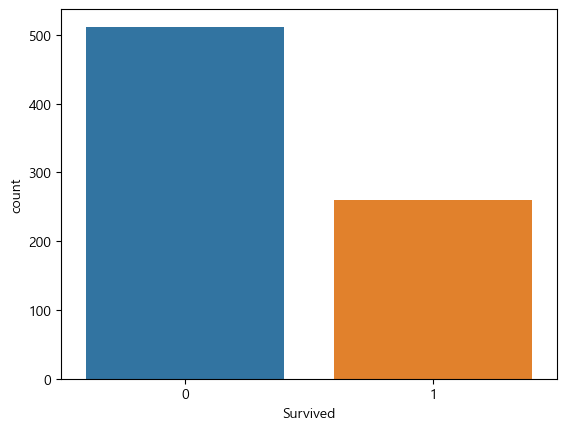

In [129]:
# sum of survivors
sns.countplot(data=df_ROS, x='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

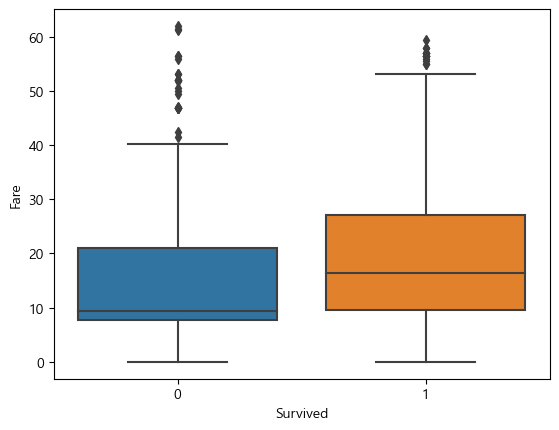

In [148]:
# 표 값을 더 많이 지불한 승객일수록 생존자가 더 많았다.
sns.boxplot(data=df_ROS, y='Fare', x='Survived')

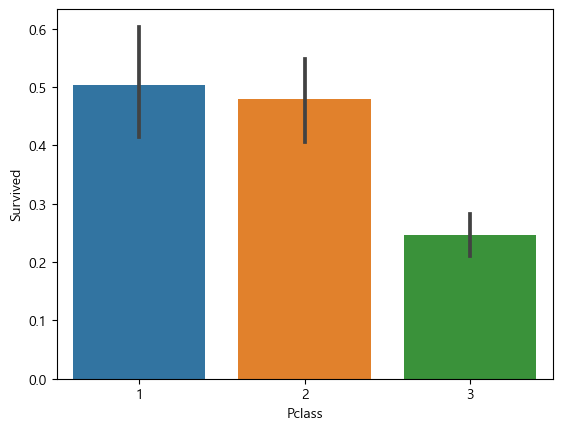

In [151]:
sns.barplot(data=df_ROS, x='Pclass', y='Survived')
plt.show()
# 1등급과 2등급 승객의 생존율이 3등급 객실 승객보다 매우 높았다.

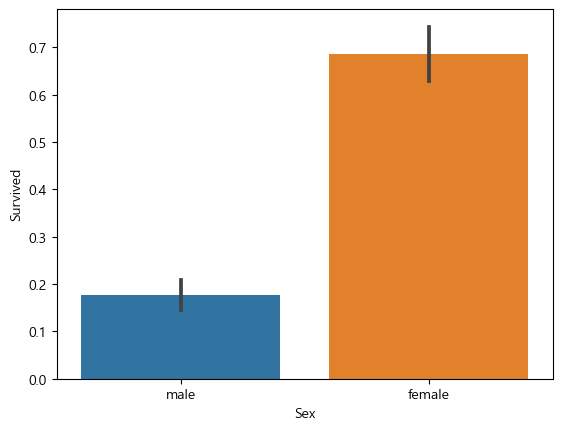

In [147]:
sns.barplot(data=df_ROS, x='Sex', y='Survived')
plt.show()
# 여성의 생존율이 월등히 높았다.

In [160]:
df_ROS_st = df_ROS[['Survived', 'SibSp']]
stat_list = df_ROS_st.describe().columns.to_list()
stat_list

['Survived', 'SibSp']

In [163]:
# 형제가 1~2 명 동승한 승객들의 평균 생존율이 타 승객보다 높았다.
df_ROS_st.groupby(['SibSp'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,SibSp,Survived
2,2,0.476190
1,1,0.465409
0,0,0.307554
4,4,0.166667
3,3,0.153846
5,5,0.000000


In [164]:
df_ROS_st = df_ROS[['Survived', 'Parch']]
stat_list = df_ROS_st.describe().columns.to_list()
stat_list

['Survived', 'Parch']

In [165]:
# 부모 자녀가 함께 동승한 승객들의 평균 생존율이 높았으나, 자녀의 수가 늘어날 수록 다시 감소하였다.
df_ROS_st.groupby(['Parch'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.525773
2,2,0.461538
0,0,0.297209
5,5,0.200000
4,4,0.000000
6,6,0.000000


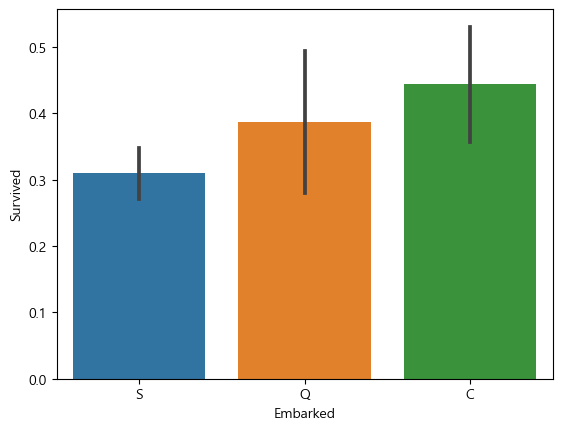

In [166]:
sns.barplot(data=df_ROS, x='Embarked', y='Survived')
plt.show()
# S < Q < C의 순서대로 생존율이 증가하였다.

## 결론

### 이번 통계는 아래와 같은 설명변수와 목표변수 간의 상관관계를 파악하였다.
- 설명변수: 'Pclass', 'Sex', 'Fare', 'SibSp', 'Parch', 'Embarked', 'SibSp', 'Parch'
- 목표변수: 'Survived'

- 연속형: 'Fare'
- 범주형: 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'

---

   <b> A. Pclass, Sex, Embarked는 목표변수와의 매우 높은 상관관계를 가진 것으로 나타났다. </b> <br>
        1. 1등급과 2등급 승객은 3등급 객실의 승객보다 더 높은 생존율을 보였다. <br>
        2. 여성의 생존율은 남성의 생존율보다 월등히 높았다. <br>
            - 여성을 먼저 탈출시킨 결과로 여성의 생존율이 더 높은 것으로 추정 <br>
        3. S, Q에 위치한 승객은 C에 위치한 승객 대비 높은 생존율을 드러냈다. <br>
            - 70%에 달하는 승객이 Cherbourg에서, 20%의 승객이 Queesntown에서, 그리고 나머지가 Southhampton에서 배에 탑승하였으므로, 비교적 많은 승객이 탑승한 C에서 사망율이 높은 것으로 추정
---
        
   <b> B. Fare 역시 목표변수와의 높은 상관관계를 가진 것으로 나타났다. </b> <br>
        1. 표값으로 더 많은 금액을 지불한 승객의 생존율이 더 높은 것으로 드러났다.
---
        
   <b> C. 동승한 가족의 수는 목표변수와의 다소 상관관계가 있음이 나타났다. </b> <br>
        1. 2명, 1명의 형제와 동승한 승객의 생존율이 가장 높았으나, 그 수가 늘어남에 따라 생존율은 다시 감소하였다. <br>
        2. 부모, 자녀가 함께 동승한 승객의 생존율이 다소 높았으나, 그 수가 늘어남에 따라 생존율은 다시 감소하였다.
        